# To-do list

### IT setup

- new virtenv
- create project structure
- create trello board
- invite collaboration
- test GH pull/push/merge

### Quick and dirty

- Streamlit (Plotly Dash) frontend
- Google Cloud Platform backend
- upload data to Google Cloud Storage
- Test that all 3 interact

### Talk extensively about dataset and different steps

### Preprocessing and start

- numerical features
- categorical features
- feature engineering
- dumb baseline model
- create dashboard design


# Load Covid dataset

## Counties that exist as LK and SK

Regensburg, Bamberg, Bayreuth, Coburg, Hof, Ansbach, Fürth, Rostock, Karlsruhe, Kaiserslautern, Rosenheim, Offenbach, Oldenburg, Landshut, Passau, Heilbronn

## Load CSV

In [2]:
import pandas as pd

covid_data = pd.read_csv('../lung_pollution/data/RKI_corona_landskreise.csv')

covid_data.shape

(411, 47)

In [5]:
covid_data.columns

Index(['OBJECTID', 'ADE', 'GF', 'BSG', 'RS', 'AGS', 'SDV_RS', 'GEN', 'BEZ',
       'IBZ', 'BEM', 'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G',
       'FK_S3', 'NUTS', 'RS_0', 'AGS_0', 'WSK', 'EWZ', 'KFL', 'DEBKG_ID',
       'Shape__Area', 'Shape__Length', 'death_rate', 'cases', 'deaths',
       'cases_per_100k', 'cases_per_population', 'BL', 'BL_ID', 'county',
       'last_update', 'cases7_per_100k', 'recovered', 'EWZ_BL',
       'cases7_bl_per_100k', 'cases7_bl', 'death7_bl', 'cases7_lk',
       'death7_lk', 'cases7_per_100k_txt', 'AdmUnitId'],
      dtype='object')

In [3]:
covid_data = covid_data[['BL','county','EWZ','Shape__Area', 'death_rate', 'cases', 'deaths','cases_per_100k']]
covid_data.head()

,BL,county,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k
0,Schleswig-Holstein,SK Flensburg,89934,4.918293e+07,1.223721,3187,39,3543.709832
1,Schleswig-Holstein,SK Kiel,246601,1.122314e+08,1.409469,8301,117,3366.166398
2,Schleswig-Holstein,SK Lübeck,215846,2.116771e+08,1.392355,7613,106,3527.051694
3,Schleswig-Holstein,SK Neumünster,79905,7.140224e+07,0.889996,2809,25,3515.424567
4,Schleswig-Holstein,LK Dithmarschen,133251,1.425511e+09,1.915323,2976,57,2233.379112


In [6]:
covid_data['deaths_per_100k'] = covid_data['deaths']/covid_data['EWZ']*100000
covid_data.head()

,OBJECTID,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,...,recovered,EWZ_BL,cases7_bl_per_100k,cases7_bl,death7_bl,cases7_lk,death7_lk,cases7_per_100k_txt,AdmUnitId,deaths_per_100k
0,1,4.0,4.0,1.0,1001,1001.0,1.001000e+10,Flensburg,Kreisfreie Stadt,40.0,...,NaN,2910875,97.908704,2850,4,100,0,"111,2",1001,43.365134
1,2,4.0,4.0,1.0,1002,1002.0,1.002000e+10,Kiel,Kreisfreie Stadt,40.0,...,NaN,2910875,97.908704,2850,4,303,0,"122,9",1002,47.445063
2,3,4.0,4.0,1.0,1003,1003.0,1.003000e+10,Lübeck,Kreisfreie Stadt,40.0,...,NaN,2910875,97.908704,2850,4,234,0,"108,4",1003,49.109087
3,4,4.0,4.0,1.0,1004,1004.0,1.004000e+10,Neumünster,Kreisfreie Stadt,40.0,...,NaN,2910875,97.908704,2850,4,102,0,"127,7",1004,31.287153
4,5,4.0,4.0,1.0,1051,1051.0,1.051004e+10,Dithmarschen,Kreis,42.0,...,NaN,2910875,97.908704,2850,4,101,0,"75,8",1051,42.776414


## Merge all Berlin 'counties' to one (to match APexpose)

In [7]:
berlin = covid_data[covid_data["BL"] == 'Berlin']
berlin

,OBJECTID,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,...,recovered,EWZ_BL,cases7_bl_per_100k,cases7_bl,death7_bl,cases7_lk,death7_lk,cases7_per_100k_txt,AdmUnitId,deaths_per_100k
399,404,NaN,NaN,NaN,11012,NaN,NaN,Berlin Reinickendorf,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,801,0,"309,1",11012,121.542314
400,405,NaN,NaN,NaN,11004,NaN,NaN,Berlin Charlottenburg-Wilmersdorf,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,899,0,"285,0",11004,101.777782
401,406,NaN,NaN,NaN,11009,NaN,NaN,Berlin Treptow-Köpenick,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,801,2,"294,0",11009,81.856190
402,407,NaN,NaN,NaN,11003,NaN,NaN,Berlin Pankow,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,1335,0,"330,8",11003,55.747299
403,408,NaN,NaN,NaN,11008,NaN,NaN,Berlin Neukölln,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,1177,0,"370,0",11008,135.794397
404,409,NaN,NaN,NaN,11011,NaN,NaN,Berlin Lichtenberg,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,597,0,"204,7",11011,93.614336
405,410,NaN,NaN,NaN,11010,NaN,NaN,Berlin Marzahn-Hellersdorf,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,610,1,"222,9",11010,93.541268
406,411,NaN,NaN,NaN,11005,NaN,NaN,Berlin Spandau,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,720,0,"301,4",11005,112.170499
407,412,NaN,NaN,NaN,11006,NaN,NaN,Berlin Steglitz-Zehlendorf,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,675,1,"232,1",11006,148.178199
408,413,NaN,NaN,NaN,11001,NaN,NaN,Berlin Mitte,Bezirk,NaN,...,NaN,3664088,305.724098,11202,4,1248,0,"333,5",11001,93.792086


In [8]:
covid_data['county'][399] = 'Berlin'
covid_data.loc[399] 

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_21054/360524747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['county'][399] = 'Berlin'


OBJECTID                                  404
ADE                                       NaN
GF                                        NaN
BSG                                       NaN
RS                                      11012
AGS                                       NaN
SDV_RS                                    NaN
GEN                      Berlin Reinickendorf
BEZ                                    Bezirk
IBZ                                       NaN
BEM                                       NaN
NBD                                       NaN
SN_L                                      NaN
SN_R                                      NaN
SN_K                                      NaN
SN_V1                                     NaN
SN_V2                                     NaN
SN_G                                      NaN
FK_S3                                     NaN
NUTS                                      NaN
RS_0                                      NaN
AGS_0                             

In [9]:
berlin_sum = berlin[['Shape__Area', 'cases', 'deaths']].sum()
berlin_sum

Shape__Area    3.571745e+11
cases          5.021469e+06
deaths         9.767200e+04
dtype: float64

In [10]:
berlin_average = berlin[['death_rate','cases_per_100k', 'deaths_per_100k']].mean()
berlin_average

death_rate            2.049408
cases_per_100k     6034.971334
deaths_per_100k     125.071466
dtype: float64

In [9]:
covid_data['cases'][399] = berlin_sum.cases
covid_data['Shape__Area'][399] = berlin_sum.Shape__Area
covid_data['deaths'][399] = berlin_sum.deaths
covid_data.loc[399] 

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58816/2349198219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['cases'][399] = berlin_sum.cases
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58816/2349198219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Shape__Area'][399] = berlin_sum.Shape__Area
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_58816/2349198219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

BL                              Berlin
county                          Berlin
EWZ                             259169
Shape__Area        357174478948.466675
death_rate                    1.618289
cases                          5021469
deaths                           97672
cases_per_100k             7510.543313
deaths_per_100k             121.542314
Name: 399, dtype: object

In [11]:
covid_data['death_rate'][399] = berlin_average.death_rate
covid_data['cases_per_100k'][399] = berlin_average.cases_per_100k
covid_data['deaths_per_100k'][399] = berlin_average.deaths_per_100k
covid_data.loc[399] 

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_21054/2965641916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['death_rate'][399] = berlin_average.death_rate
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_21054/2965641916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['cases_per_100k'][399] = berlin_average.cases_per_100k
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_21054/2965641916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

OBJECTID                                  404
ADE                                       NaN
GF                                        NaN
BSG                                       NaN
RS                                      11012
AGS                                       NaN
SDV_RS                                    NaN
GEN                      Berlin Reinickendorf
BEZ                                    Bezirk
IBZ                                       NaN
BEM                                       NaN
NBD                                       NaN
SN_L                                      NaN
SN_R                                      NaN
SN_K                                      NaN
SN_V1                                     NaN
SN_V2                                     NaN
SN_G                                      NaN
FK_S3                                     NaN
NUTS                                      NaN
RS_0                                      NaN
AGS_0                             

In [12]:
covid_data.drop(index=[400,401,402,403,404,405,406,407,408,409,410], axis=0, inplace=True)

In [13]:
covid_data.shape

(400, 48)

# Load APexpose air pollution dataset

## Load data

In [15]:
import chardet
with open("../raw_data/APexpose.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.717512331990768, 'language': ''}

In [17]:
import pandas as pd 
pollution_data = pd.read_csv("../raw_data/APexpose.csv",
                             sep=';',
                             decimal='.',
                            encoding = 'Windows-1252'
                            )
pollution_data.head()

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,PM10_annualMean,PM10_daysOver50,PM2.5_annualMean,kreis_code,scenario,ISO_code,Kreis_Scluessel,Lon,Lat
0,SK Freiburg i.Breisgau,2019,1575711,0.000000,6600048,554519,6,8370603,218.5,206925,1247323,2,8984028,12,remote,DE.BW.FB,8311,781.807.596.196.695,479.925.229.956.189
1,LK Dillingen a.d.Donau,2019,"1,89533E+14",0.004595,"9,5195E+14","5,5639E+14","3,80237E+14","7,88278E+14","1,80314E+14","1,63814E+14","1,72883E+14","5,36691E+14","1,29524E+14",68,remote,DE.BY.DD,9773,105.277.641.680.394,485.964.037.973.776
2,SK NŸrnberg,2019,2538007,0.000000,1251538,4532018,0,7369548,160.34,1556725,"1,53677E+14","4,89558E+14",1151754,107,remote,DE.BY.NR,9564,110.827.553.425.797,494.362.114.486.059
3,LK Neumarkt i.d.OPf.,2019,"1,57092E+14",0.003532,"8,1766E+14","5,20949E+14","2,18259E+14","7,65906E+14","1,79684E+14","1,62613E+14","1,60922E+14","4,89558E+14","1,22698E+14",110,remote,DE.BY.NO,9373,115.665.579.196.823,492.159.614.099.495
4,SK Rosenheim,2019,"1,75246E+14",0.004127,"8,68246E+14","5,25933E+14","2,41035E+14","7,69051E+14","1,79773E+14","1,62782E+14","1,64141E+14","4,89558E+14","1,24855E+14",122,remote,DE.BY.RH,9163,121.087.247.510.606,478.443.777.181.448


In [48]:
pollution_data.shape

(12060, 19)

## Clean AP expose county column to match Covid dataset

In [18]:
pollution_data['county'][:20]

0     SK Freiburg i.Breisgau
1     LK Dillingen a.d.Donau
2                SK NŸrnberg
3       LK Neumarkt i.d.OPf.
4               SK Rosenheim
5           SK Wilhelmshaven
6                LK Wittmund
7          LK Recklinghausen
8               LK Steinfurt
9                   LK Kusel
10                LK Neuwied
11            LK Neunkirchen
12            LK Ostholstein
13                 SK Amberg
14                  SK FŸrth
15               LK GŸnzburg
16             LK Regensburg
17          LK Rhšn-Grabfeld
18            LK Elbe-Elster
19     LK Marburg-Biedenkopf
Name: county, dtype: object

In [19]:
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('Ÿ','ü'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('š','ö'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('§','ß'))
pollution_data['county'] = pollution_data['county'].apply(lambda x: x.replace('Š','ä'))
pollution_data['county'][150:200]

150                        LK Lindau
151                        SK Passau
152             LK Märkisch-Oderland
153                     LK Oberhavel
154             LK Darmstadt-Dieburg
155           LK Nordwestmecklenburg
156                         LK Celle
157                     SK Osnabrück
158                     LK Osnabrück
159                       LK Stendal
160                      SK Chemnitz
161                          SK Kiel
162            LK Rhein-Neckar-Kreis
163                        LK Dachau
164                         LK Fürth
165                     SK Memmingen
166                         LK Fulda
167          LK Rhein-Hunsrück-Kreis
168      LK Stadtverband Saarbrücken
169                     SK Flensburg
170                       LK Ansbach
171                         LK Regen
172                         SK Herne
173                         LK Kleve
174                       SK Krefeld
175               SK Mönchengladbach
176                   LK Germersheim
1

## Convert columns to floats 

In [20]:
pollution_data.dtypes

county                    object
year                       int64
NO2_annualMean            object
NO2_hrOver200            float64
NO_annualMean             object
O3_annualMean             object
O3_daysOver120            object
O3_dailyMaxAnnualMean     object
O3_dailyHourlyMax         object
O3_daily8HrMax            object
PM10_annualMean           object
PM10_daysOver50           object
PM2.5_annualMean          object
kreis_code                 int64
scenario                  object
ISO_code                  object
Kreis_Scluessel            int64
Lon                       object
Lat                       object
dtype: object

In [21]:
for column in ['NO2_annualMean', 'NO_annualMean','O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean','O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean','PM10_daysOver50', 'PM2.5_annualMean']:
    pollution_data[column] = pollution_data[column].apply(lambda x: x.replace(',','.'))
pollution_data[['NO2_annualMean', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2.5_annualMean']]

,NO2_annualMean,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,PM10_annualMean,PM10_daysOver50,PM2.5_annualMean
0,1575711,6600048,554519,6,8370603,218.5,206925,1247323,2,8984028
1,1.89533E+14,9.5195E+14,5.5639E+14,3.80237E+14,7.88278E+14,1.80314E+14,1.63814E+14,1.72883E+14,5.36691E+14,1.29524E+14
2,2538007,1251538,4532018,0,7369548,160.34,1556725,1.53677E+14,4.89558E+14,1151754
3,1.57092E+14,8.1766E+14,5.20949E+14,2.18259E+14,7.65906E+14,1.79684E+14,1.62613E+14,1.60922E+14,4.89558E+14,1.22698E+14
4,1.75246E+14,8.68246E+14,5.25933E+14,2.41035E+14,7.69051E+14,1.79773E+14,1.62782E+14,1.64141E+14,4.89558E+14,1.24855E+14
...,...,...,...,...,...,...,...,...,...,...
12055,1.62945E+14,1.00408E+14,4.83182E+14,0.475016480031872,7.41372E+14,1.78878E+14,1.61199E+14,1.69622E+14,8.22521E+14,1.27782E+14
12056,1.55135E+14,8.85344E+14,4198194,0,539256,7608353,7190579,1.73673E+14,8.19956E+14,1.30136E+14
12057,1.75476E+14,9.02635E+14,5.1264E+14,1.81105E+14,7.60073E+14,1.79476E+14,1.62269E+14,1.78348E+14,7.28954E+14,1.33293E+14
12058,1317742,7047741,5017721,2,7453781,1670885,161277,2275303,15,1.39323E+14


In [22]:
for column in ['NO2_annualMean', 'NO_annualMean','O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean','O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean','PM10_daysOver50', 'PM2.5_annualMean']:
    pollution_data[column] = pollution_data[column].apply(lambda x: float(x))

In [23]:
pollution_data.dtypes

county                    object
year                       int64
NO2_annualMean           float64
NO2_hrOver200            float64
NO_annualMean            float64
O3_annualMean            float64
O3_daysOver120           float64
O3_dailyMaxAnnualMean    float64
O3_dailyHourlyMax        float64
O3_daily8HrMax           float64
PM10_annualMean          float64
PM10_daysOver50          float64
PM2.5_annualMean         float64
kreis_code                 int64
scenario                  object
ISO_code                  object
Kreis_Scluessel            int64
Lon                       object
Lat                       object
dtype: object

## Drop counties present in APexpore but not Covid

Eisenach, Osterode am Harz: drop those rows for all time points

In [24]:
pollution_data.shape

(12060, 19)

In [25]:
pollution_data = pollution_data[pollution_data.county != 'Eisenach']
pollution_data.shape

(12030, 19)

In [26]:
pollution_data = pollution_data[pollution_data.county != 'Osterode am Harz']
pollution_data.shape


(12000, 19)

In [27]:
time_point_order = [12,13,14, 15,16,17, 9,10,11, 3,4,5, 27,28,29, 6,7,8, 21,22,23, 18,19,20, 24,25,26, 0,1,2]
time_point_order = [i*400 for i in time_point_order]

In [107]:
temporal_time_points = [pollution_data['PM2.5_annualMean'][300+i] for i in time_point_order]

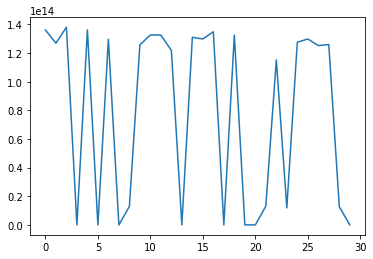

In [108]:
import matplotlib.pyplot as plt
plt.plot(temporal_time_points)

# Merge APexpose and Covid datasets

In [24]:
merge_df = pol_df.merge(covid_data, how='inner', on='county')
merge_df

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,...,Lon,Lat,BL,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k
0,SK Freiburg i.Breisgau,2019,1.575711e+06,0.000000,6.600048e+06,5.545190e+05,6.000000e+00,8.370603e+06,2.185000e+02,2.069250e+05,...,781.807.596.196.695,479.925.229.956.189,Baden-Württemberg,230940,1.541063e+08,1.606712,11203,180,4851.043561,77.942323
1,LK Dillingen a.d.Donau,2019,1.895330e+14,0.004595,9.519500e+14,5.563900e+14,3.802370e+14,7.882780e+14,1.803140e+14,1.638140e+14,...,105.277.641.680.394,485.964.037.973.776,Bayern,97172,7.912135e+08,2.249683,6312,142,6495.698349,146.132631
2,SK Nürnberg,2019,2.538007e+06,0.000000,1.251538e+06,4.532018e+06,0.000000e+00,7.369548e+06,1.603400e+02,1.556725e+06,...,110.827.553.425.797,494.362.114.486.059,Bayern,515543,1.876389e+08,2.179166,45935,1001,8910.023024,194.164211
3,LK Neumarkt i.d.OPf.,2019,1.570920e+14,0.003532,8.176600e+14,5.209490e+14,2.182590e+14,7.659060e+14,1.796840e+14,1.626130e+14,...,115.665.579.196.823,492.159.614.099.495,Bayern,135225,1.344695e+09,1.640955,10177,167,7525.975226,123.497874
4,SK Rosenheim,2019,1.752460e+14,0.004127,8.682460e+14,5.259330e+14,2.410350e+14,7.690510e+14,1.797730e+14,1.627820e+14,...,121.087.247.510.606,478.443.777.181.448,Bayern,63591,3.678518e+07,1.298061,6086,79,9570.536711,124.231416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,LK Rhein-Pfalz-Kreis,2019,1.435690e+13,0.003088,8.435670e+14,4.967950e+14,1.078660e+14,7.506580e+14,1.792550e+13,1.617940e+14,...,836.068.108.599.452,494.166.499.819.624,Rheinland-Pfalz,154754,3.043513e+08,2.617569,9016,236,5826.020652,152.500097
396,SK Trier,2019,1.390440e+14,0.002940,7.896900e+14,5.063600e+14,1.515810e+14,7.566960e+14,1.794250e+14,1.621180e+14,...,665.505.102.151.899,497.629.388.320.165,Rheinland-Pfalz,110674,1.155826e+08,1.015228,3743,38,3382.004807,34.335074
397,LK Saalekreis,2019,1.610540e+14,0.003662,8.125810e+14,5.303140e+14,2.610610e+13,7.718170e+14,1.798510e+14,1.629300e+14,...,118.654.740.379.904,51.425.671.077.267,Sachsen-Anhalt,183434,1.440549e+09,2.886809,12713,367,6930.558130,200.071960
398,LK Wittenberg,2019,1.073210e+05,0.000000,2.249014e+06,5.600941e+06,1.000000e+00,8.095341e+06,1.834000e+02,1.802612e+06,...,127.015.882.396.174,518.201.400.674.261,Sachsen-Anhalt,124185,1.944608e+09,3.714637,8130,302,6546.684382,243.185570


In [25]:
merge_df.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2.5_annualMean', 'kreis_code', 'scenario',
       'ISO_code', 'Kreis_Scluessel', 'Lon', 'Lat', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k'],
      dtype='object')

In [26]:
merge_df.dtypes

county                    object
year                       int64
NO2_annualMean           float64
NO2_hrOver200            float64
NO_annualMean            float64
O3_annualMean            float64
O3_daysOver120           float64
O3_dailyMaxAnnualMean    float64
O3_dailyHourlyMax        float64
O3_daily8HrMax           float64
PM10_annualMean          float64
PM10_daysOver50          float64
PM2.5_annualMean         float64
kreis_code                 int64
scenario                  object
ISO_code                  object
Kreis_Scluessel            int64
Lon                       object
Lat                       object
BL                        object
EWZ                        int64
Shape__Area              float64
death_rate               float64
cases                      int64
deaths                     int64
cases_per_100k           float64
deaths_per_100k          float64
dtype: object

# Covid & Air pollution - quick correlation check

In [27]:
merge_df = merge_df[['county', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2.5_annualMean', 'cases_per_100k','deaths_per_100k']]

In [28]:
merge_df = merge_df.rename(columns={'PM2.5_annualMean': 'PM2_5_annualMean'})

In [29]:
num_fact = ['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean']

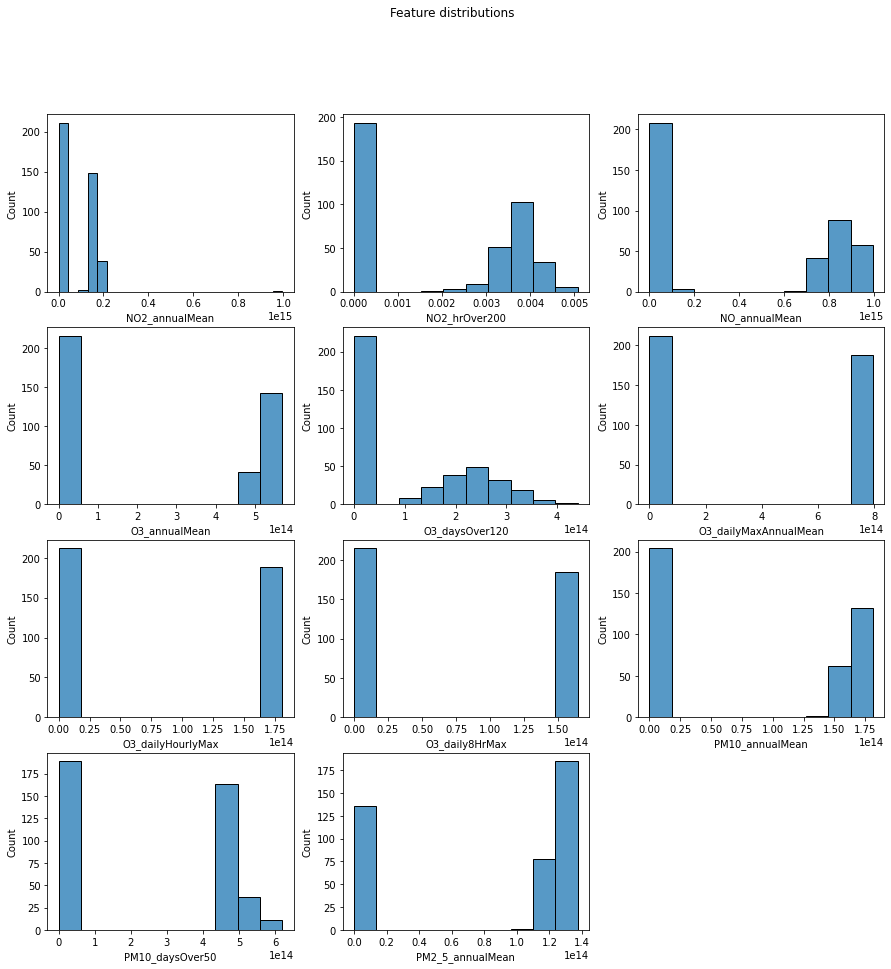

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))

for i, feature in enumerate(num_fact):
    # First subplot
    plt.subplot(4,3,i+1)
    sns.histplot(merge_df[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

<AxesSubplot:>

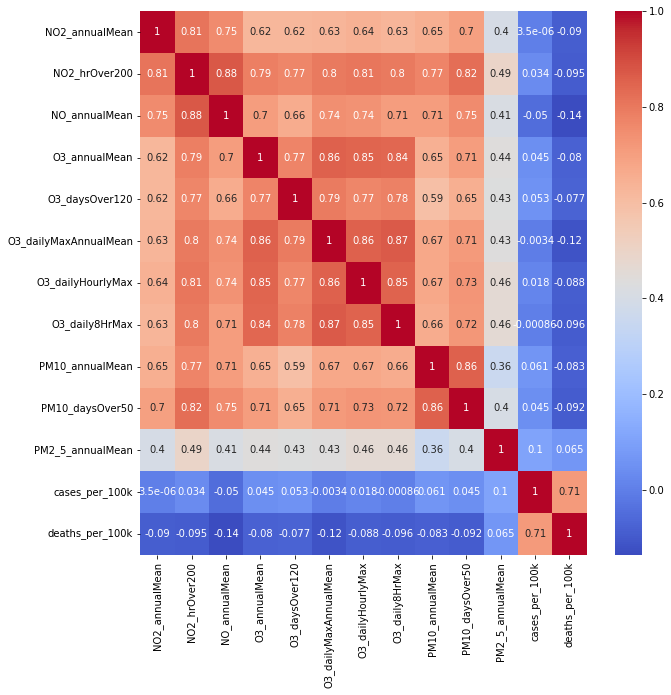

In [31]:
plt.figure(figsize = (10,10))

sns.heatmap(merge_df.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

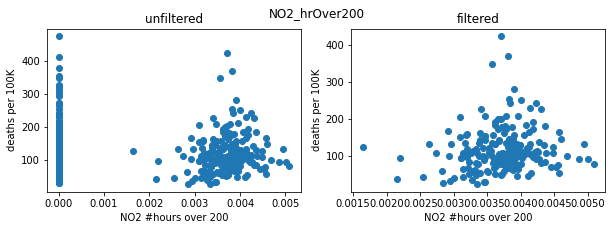

In [32]:
# Start a figure
plt.figure(figsize=(10,3))
# First subplot
plt.subplot(1,2,1)
plt.scatter(merge_df['NO2_hrOver200'], merge_df['deaths_per_100k'])
plt.xlabel("NO2 #hours over 200")
plt.ylabel("deaths per 100K")
plt.title('unfiltered')
# Second subplot
plt.subplot(1,2,2) 
x = merge_df[merge_df['NO2_hrOver200']>0.001]
plt.scatter(x['NO2_hrOver200'], x['deaths_per_100k'])
plt.xlabel("NO2 #hours over 200")
plt.ylabel("deaths per 100K")
plt.title("filtered")
# Global figure methods
plt.suptitle('NO2_hrOver200')
plt.show()

In [33]:
import statsmodels.formula.api as smf

In [34]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_hrOver200', data = x).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.483
Date:                Wed, 17 Nov 2021   Prob (F-statistic):             0.0634
Time:                        12:08:25   Log-Likelihood:                -1130.8
No. Observations:                 207   AIC:                             2266.
Df Residuals:                     205   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        60.6206     31.246      1.940      0.054      -0.985     122.226
NO2_hrOver200  1.555e+04   8331.166      1.866      0.063    -877.756     3.2e+04
==============================================================================
Omnibus:                       94.525   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.639
Skew:                           1.813   Prob(JB):                     4.51e-87
Kurtosis:                       8.741   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

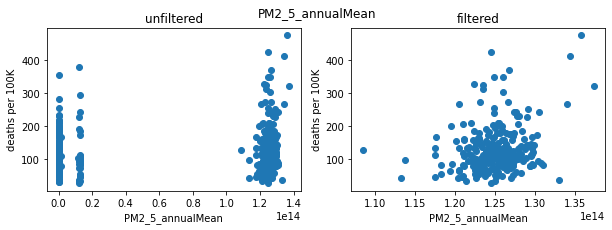

In [36]:
# Start a figure
plt.figure(figsize=(10,3))
# First subplot
plt.subplot(1,2,1)
plt.scatter(merge_df['PM2_5_annualMean'], merge_df['deaths_per_100k'])
plt.xlabel("PM2_5_annualMean")
plt.ylabel("deaths per 100K")
plt.title('unfiltered')
# Second subplot
plt.subplot(1,2,2) 
x = merge_df[merge_df['PM2_5_annualMean']>10**14]
plt.scatter(x['PM2_5_annualMean'], x['deaths_per_100k'])
plt.xlabel("PM2_5_annualMean")
plt.ylabel("deaths per 100K")
plt.title("filtered")
# Global figure methods
plt.suptitle('PM2_5_annualMean')
plt.show()

In [37]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = x).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                nan
Time:                        12:08:25   Log-Likelihood:                -1493.1
No. Observations:                 264   AIC:                             2988.
Df Residuals:                     263   BIC:                             2992.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.232e-27   2.73e-28     30.209      0.000     7.7e-27    8.77e-27
PM2_5_annualMean   1.03e-12   3.41e-14     30.209      0.000    9.63e-13     1.1e-12
==============================================================================
Omnibus:                      111.728   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.453
Skew:                           1.848   Prob(JB):                     2.43e-83
Kurtosis:                       7.574   Cond. No.                     4.70e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""